<a href="https://colab.research.google.com/github/Freesoul-tech/Louis-Mahobe/blob/main/NLP35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2025-09-06 17:10:39--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  16.3MB/s    in 8.9s    

2025-09-06 17:10:48 (9.01 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [2]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target


print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()


df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [9]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [10]:
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]


In [11]:
import re
from collections import defaultdict

def tokenize(text):
    # Lowercase and extract words using regex
    return re.findall(r'\b\w+\b', text.lower())

def generate_ngrams(tokens, n):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

def build_vocab(sentences, ngram=1):
    vocab = set()
    tokenized_sentences = []
    for sentence in sentences:
        tokens = tokenize(sentence)
        ngrams = generate_ngrams(tokens, ngram)
        tokenized_sentences.append(ngrams)
        vocab.update(ngrams)
    return sorted(vocab), tokenized_sentences

def vectorize(tokenized_sentences, vocab):
    vectors = []
    for tokens in tokenized_sentences:
        freq = defaultdict(int)
        for token in tokens:
            freq[token] += 1
        vector = [freq[word] for word in vocab]
        vectors.append(vector)
    return vectors

def print_bow(sentences, ngram):
    print(f"\n--- {ngram}-gram BoW ---")
    vocab, tokenized = build_vocab(sentences, ngram)
    vectors = vectorize(tokenized, vocab)
    print("Vocabulary:", vocab)
    for i, vec in enumerate(vectors):
        print(f"Sentence {i+1}: {vec}")

# Run for both 1-gram and 2-gram
print_bow(sentences, ngram=1)
print_bow(sentences, ngram=2)



--- 1-gram BoW ---
Vocabulary: ['a', 'best', 'ever', 'funny', 'i', 'is', 'movie', 'never', 'soooo', 'this', 'what']
Sentence 1: [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]
Sentence 2: [1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
Sentence 3: [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0]

--- 2-gram BoW ---
Vocabulary: ['a movie', 'best movie', 'ever this', 'i never', 'is soooo', 'movie ever', 'movie i', 'movie is', 'soooo funny', 'this movie', 'what a']
Sentence 1: [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
Sentence 2: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
Sentence 3: [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]


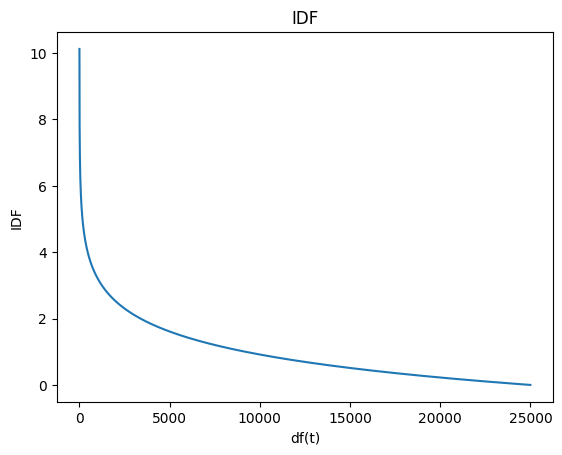

In [12]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [14]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [15]:
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

stop word : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


In [18]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Load IMDB dataset
train_data = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_data.data, train_data.target

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    max_features=5000,
    norm='l2',
    token_pattern=r'\b\w+\b'
)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(x_train)

# Inspect the shape and sample features
print("TF-IDF matrix shape:", X_train_tfidf.shape)
print("Sample features:", vectorizer.get_feature_names_out()[:20])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF matrix shape: (25000, 5000)
Sample features: ['0' '00' '000' '1' '10' '100' '11' '12' '13' '13th' '14' '15' '16' '17'
 '18' '1930' '1930s' '1933' '1940' '1950']


In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


nltk.download('stopwords')
stop_words_nltk = stopwords.words('english')

# Load IMDB dataset
train_data = load_files('./aclImdb/train/', encoding='utf-8')
test_data = load_files('./aclImdb/test/', encoding='utf-8')
x_train, y_train = train_data.data, train_data.target
x_test, y_test = test_data.data, test_data.target

# Parameter grid
configs = [
    {'max_features': 1000, 'stop_words': None, 'ngram_range': (1,1)},
    {'max_features': 5000, 'stop_words': stop_words_nltk, 'ngram_range': (1,1)},
    {'max_features': 10000, 'stop_words': stop_words_nltk, 'ngram_range': (1,2)},
]

# Run experiments
for config in configs:
    print(f"\n🔧 Config: {config}")
    vectorizer = TfidfVectorizer(
        max_features=config['max_features'],
        stop_words=config['stop_words'],
        ngram_range=config['ngram_range'],
        token_pattern=r'\b\w+\b'
    )
    X_train = vectorizer.fit_transform(x_train)
    X_test = vectorizer.transform(x_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔧 Config: {'max_features': 1000, 'stop_words': None, 'ngram_range': (1, 1)}
✅ Accuracy: 0.8672

🔧 Config: {'max_features': 5000, 'stop_words': ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o

In [20]:
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]


In [21]:
import re
from math import log
from collections import Counter

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

tokenized = [tokenize(s) for s in sentences]
vocab = sorted(set(word for doc in tokenized for word in doc))


In [22]:
def compute_tf_standard(doc_tokens):
    total = len(doc_tokens)
    counts = Counter(doc_tokens)
    return [counts[word] / total for word in vocab]

def compute_tf_sklearn(doc_tokens):
    counts = Counter(doc_tokens)
    return [counts[word] for word in vocab]


In [23]:
def compute_idf_standard(docs):
    N = len(docs)
    df = [sum(1 for doc in docs if word in doc) for word in vocab]
    return [log(N / df_i) if df_i else 0 for df_i in df]

def compute_idf_sklearn(docs):
    N = len(docs)
    df = [sum(1 for doc in docs if word in doc) for word in vocab]
    return [log(1 + N / (1 + df_i)) + 1 for df_i in df]


In [24]:
def compute_tfidf(tf_func, idf_values):
    return [[tf * idf for tf, idf in zip(tf_func(doc), idf_values)] for doc in tokenized]

idf_std = compute_idf_standard(tokenized)
idf_sklearn = compute_idf_sklearn(tokenized)

tfidf_std = compute_tfidf(compute_tf_standard, idf_std)
tfidf_sklearn = compute_tfidf(compute_tf_sklearn, idf_sklearn)


In [5]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, vector_size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=10) # 学習

print("語彙の一覧 : {}".format(model.wv.index_to_key))

for vocab in model.wv.index_to_key:
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : ['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie']
veryのベクトル : 
[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
badのベクトル : 
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
goodのベクトル : 
[ 0.07311065  0.05070519  0.06759309  0.00761263  0.06350898 -0.03405724
 -0.0094533   0.05768519 -0.07522386 -0.03936936]
isのベクトル : 
[-0.07511994 -0.00930093  0.09538642 -0.07319568 -0.02333897 -0.01937847
  0.0807788  -0.05931221  0.00045165 -0.04753995]
thisのベクトル : 
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
aのベクトル : 
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
filmのベクトル : 
[-0.01577198  0.00321244 -0.04143998 -0.07683337 -0.01508437  0.0247105
 -0.00889703  0.05535757 -0.02743117 

In [27]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

In [6]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.4273821711540222),
 ('bad', 0.3293360769748688),
 ('very', 0.30043885111808777)]

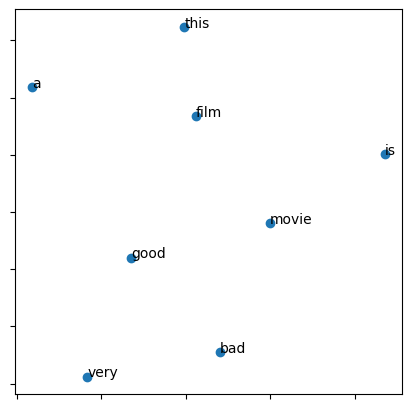

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

vocabs = model.wv.index_to_key

tsne_model = TSNE(perplexity=5, n_components=2, init="pca", max_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [11]:
from sklearn.datasets import load_files
from gensim.models import Word2Vec
import nltk
import re


nltk.download('punkt')
nltk.download('punkt_tab')


train_data = load_files('./aclImdb/train/', encoding='utf-8')
x_train = train_data.data

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return nltk.word_tokenize(text)

tokenized_reviews = [preprocess(review) for review in x_train]

model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=1
)

model.save("imdb_word2vec.model")
print("Vector for 'movie':", model.wv['movie'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Vector for 'movie': [ 0.39243355  0.21944195 -0.1303268   0.19413508  0.07782822 -0.27532238
  0.41710675  0.557545   -0.30735284 -0.21480471 -0.12936832 -0.17627645
  0.07293097  0.2791598   0.18355747  0.09010501  0.07690486 -0.08441417
 -0.44129446 -0.4004264   0.16081162  0.08593959  0.41683352 -0.20227396
 -0.02411512 -0.09456918  0.10995523  0.02195552 -0.29733106 -0.12302063
  0.30631804 -0.17846698  0.01767302 -0.33424792 -0.25225294  0.3858614
  0.2377138   0.17533554 -0.5607776  -0.2937836   0.03880206 -0.09623612
 -0.14480866  0.23575348 -0.03739697 -0.09774535  0.10440417 -0.24174689
  0.11895628  0.10256287 -0.17371845 -0.09608482 -0.12213378  0.28115067
  0.20108093  0.22206093 -0.05796538 -0.1695224  -0.10607623  0.24864063
 -0.00244299  0.26006606  0.36523974  0.03209424 -0.5569062   0.5817427
  0.0993852   0.54947037 -0.26239184  0.00951275  0.20598832  0.3064425
  0.24780548  0.1384215   0.16896217 -0.04914963  0.23528574 -0.20197847
 -0.2142297  -0.16058053 -0.178781

In [12]:
model.wv.most_similar('funny', topn=5)


[('hilarious', 0.8201478123664856),
 ('scary', 0.7753288149833679),
 ('amusing', 0.7740336060523987),
 ('humorous', 0.7496095895767212),
 ('laughoutloud', 0.7462106347084045)]

In [13]:

nltk.download('punkt')

def preprocess_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = text.lower()

    tokens = nltk.word_tokenize(text)

    return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
sample_review = "This movie is very funny!!! Check it out at https://louis.com"
tokens = preprocess_text(sample_review)
print(tokens)


['this', 'movie', 'is', 'very', 'funny', 'check', 'it', 'out', 'at']


In [17]:
from sklearn.datasets import load_files


train_data = load_files('./aclImdb/train/', encoding='utf-8')
x_train = train_data.data

tokenized_corpus = [preprocess_text(review) for review in x_train]


In [19]:
model.wv.most_similar('funny', topn=5)


[('hilarious', 0.8201478123664856),
 ('scary', 0.7753288149833679),
 ('amusing', 0.7740336060523987),
 ('humorous', 0.7496095895767212),
 ('laughoutloud', 0.7462106347084045)]

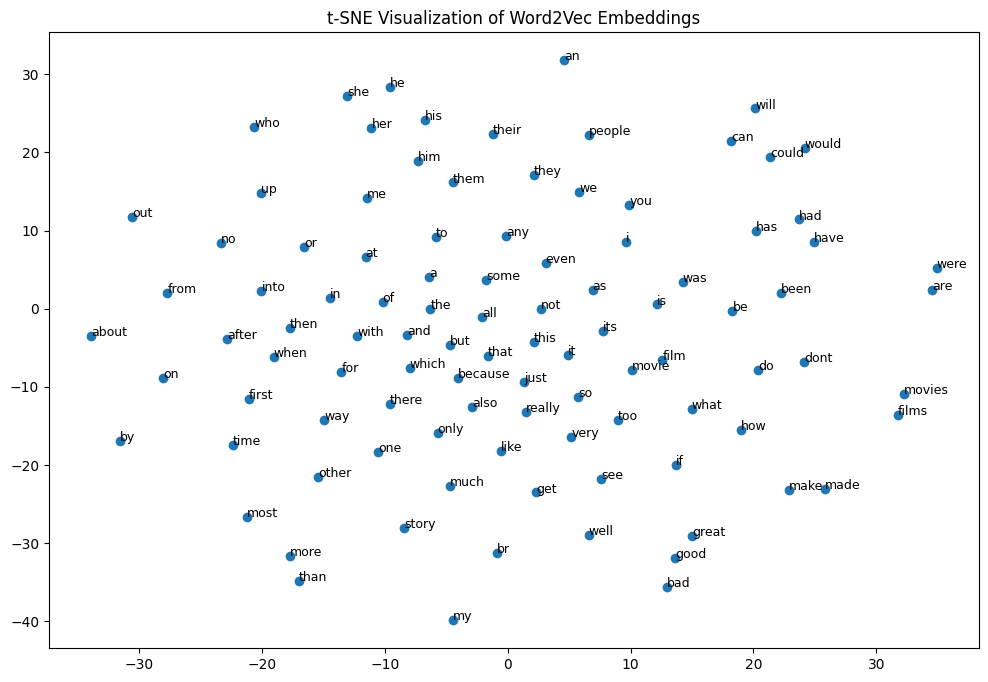

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


words_to_plot = [word for word in model.wv.index_to_key if model.wv.get_vecattr(word, "count") > 50][:100]
word_vectors = [model.wv[word] for word in words_to_plot]
word_vectors = np.array(word_vectors) # Convert list to numpy array


tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
vectors_2d = tsne.fit_transform(word_vectors)


plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, word in enumerate(words_to_plot):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=9)
plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.show()

In [22]:
print("Similar to 'funny':", model.wv.most_similar('funny', topn=5))
print("Similar to 'bad':", model.wv.most_similar('bad', topn=5))
print("Similar to 'actor':", model.wv.most_similar('actor', topn=5))


Similar to 'funny': [('hilarious', 0.8201478123664856), ('scary', 0.7753288149833679), ('amusing', 0.7740336060523987), ('humorous', 0.7496095895767212), ('laughoutloud', 0.7462106347084045)]
Similar to 'bad': [('terrible', 0.791187584400177), ('awful', 0.7747201323509216), ('horrible', 0.7658597826957703), ('lousy', 0.760310173034668), ('good', 0.756594181060791)]
Similar to 'actor': [('comedian', 0.7590372562408447), ('performer', 0.7568117380142212), ('actress', 0.7362398505210876), ('impersonation', 0.7081936597824097), ('storyteller', 0.6968997120857239)]


In [23]:
model.wv.most_similar(positive=['king', 'woman'], negative=['man'])


[('queen', 0.6378641128540039),
 ('queens', 0.5934929847717285),
 ('prince', 0.5903436541557312),
 ('kings', 0.5855620503425598),
 ('princess', 0.5637620687484741),
 ('godmother', 0.5632109642028809),
 ('bride', 0.5611404180526733),
 ('anne', 0.5602623820304871),
 ('stepsisters', 0.5579169988632202),
 ('austen', 0.5446179509162903)]

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_files
import nltk
import re
from gensim.models import Word2Vec

.
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    return tokens

def document_vector(word2vec_model, doc):

    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if not doc:
        return np.zeros(word2vec_model.wv.vector_size)

    return np.mean(word2vec_model.wv[doc], axis=0)


train_data = load_files('./aclImdb/train/', encoding='utf-8')
test_data = load_files('./aclImdb/test/', encoding='utf-8')
x_train, y_train = train_data.data, train_data.target
x_test, y_test = test_data.data, test_data.target


tokenized_reviews = [preprocess_text(review) for review in x_train]
tokenized_test_reviews = [preprocess_text(review) for review in x_test]


try:
    word2vec_model = Word2Vec.load("imdb_word2vec.model")
except:

    word2vec_model = model


X_train_avg = np.array([document_vector(word2vec_model, doc) for doc in tokenized_reviews])
X_test_avg = np.array([document_vector(word2vec_model, doc) for doc in tokenized_test_reviews])


model = LogisticRegression(max_iter=1000)
model.fit(X_train_avg, y_train)
y_pred = model.predict(X_test_avg)
print("Custom Word2Vec Accuracy:", accuracy_score(y_test, y_pred))


Custom Word2Vec Accuracy: 0.85296
